<a href="https://colab.research.google.com/github/marcelohirota/Movies_Recomendations/blob/master/movies_recommendations(unsupervised_algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

movies = pd.read_csv(uri)
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Preparing data for manipulation**

**Separating genres by column**

In [3]:
genres = movies.genres.str.get_dummies()
movies_data = pd.concat([movies,genres], axis=1)
movies_data.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Assign different weights for movies genres**

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

genres_scaled = scaler.fit_transform(genres)

genres_scaled

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

**Creating clusters - putting similar movies into groups (3 clusters)**

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(genres_scaled)

print(f'Grupos {model.labels_}')

Grupos [1 1 2 ... 0 1 2]


In [6]:
print(genres.columns)
print(model.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.04664095 -0.26707321 -0.23666083 -0.24926835 -0.72500131
   0.22076268 -0.21234806  0.49413512 -0.17435623  0.10027744  0.23865958
  -0.09458655 -0.0980555   0.21015749 -0.07569567  0.00277716  0.41685133
   0.13572825  0.00447923]
 [-0.05917995  0.70323787  1.68228325  1.34478724  1.24360715 -0.12798411
  -0.28916513 -0.2105558  -0.62515663  1.03234148 -0.08727301 -0.24062445
   0.60685057  0.15580671 -0.15206949 -0.29285548  0.64928872 -0.21110478
  -0.15380056 -0.03222851]
 [ 0.09791298 -0.3256722  -0.29590942 -0.20698278 -0.15260127  0.97355615
  -0.17225648  0.35065067 -0.39392158 -0.16823218 -0.09492563 -0.21346471
  -0.10898274  0.06615215 -0.21061118  0.20742755 -0.24928268 -0.45201369
 

In [7]:
clusters = pd.DataFrame(model.cluster_centers_, columns=genres.columns)

clusters

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.046641,-0.267073,-0.236661,-0.249268,-0.725001,0.220763,-0.212348,0.494135,-0.174356,0.100277,0.238660,-0.094587,-0.098055,0.210157,-0.075696,0.002777,0.416851,0.135728,0.004479
1,-0.059180,0.703238,1.682283,1.344787,1.243607,-0.127984,-0.289165,-0.210556,-0.625157,1.032341,-0.087273,-0.240624,0.606851,0.155807,-0.152069,-0.292855,0.649289,-0.211105,-0.153801,-0.032229
2,0.097913,-0.325672,-0.295909,-0.206983,-0.152601,0.973556,-0.172256,0.350651,-0.393922,-0.168232,-0.094926,-0.213465,-0.108983,0.066152,-0.210611,0.207428,-0.249283,-0.452014,-0.114983,0.006482


**Plotting the data**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f7a854c50>,
      dtype=object)

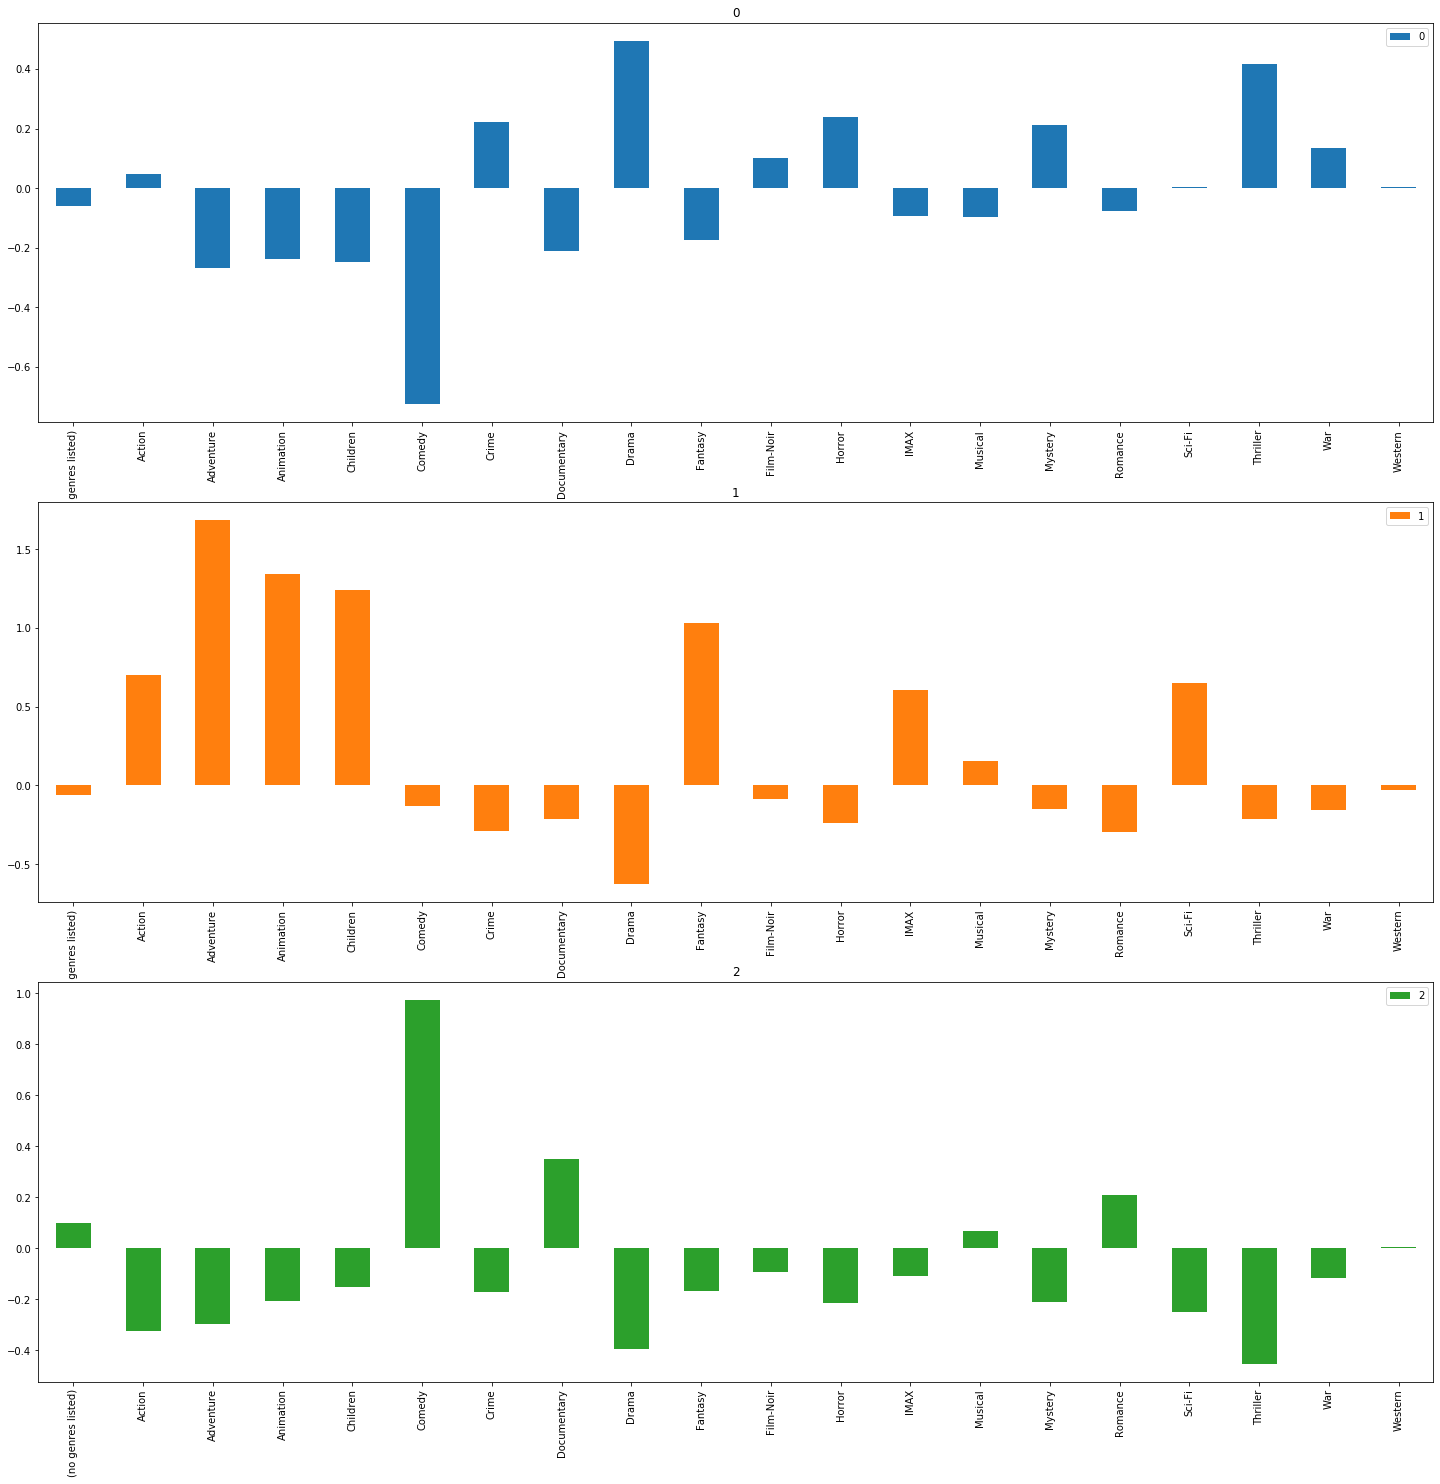

In [8]:
clusters.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False)

**Checking cluster content** 

In [9]:
group = 0

cluster_filter = model.labels_ == group

movies_data[cluster_filter].sample(10)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3100,4160,"Widow of St. Pierre, The (Veuve de Saint-Pierr...",Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3095,4155,Sweet November (2001),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4545,6751,Cold Creek Manor (2003),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5114,8142,Dead or Alive: Hanzaisha (1999),Action|Crime,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5514,26492,Twilight Zone: The Movie (1983),Fantasy|Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
6989,67186,"Haunting in Connecticut, The (2009)",Horror|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9644,179817,Darkest Hour (2017),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2236,2971,All That Jazz (1979),Drama|Fantasy|Musical,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
1846,2455,"Fly, The (1986)",Drama|Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
9188,149612,Swelter (2014),Action|Drama|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


**Rescaling data to create a 2D chart**

In [0]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE()

visualization = tsne.fit_transform(genres_scaled)

visualization

array([[ 55.846054 ,  34.71726  ],
       [-55.276005 ,  55.74476  ],
       [ -4.993101 , -40.798203 ],
       ...,
       [ -7.7316856,  -3.9952564],
       [ -6.6367264,  42.783688 ],
       [ 23.048807 ,  22.470142 ]], dtype=float32)

**Plotting a new 2D chart**

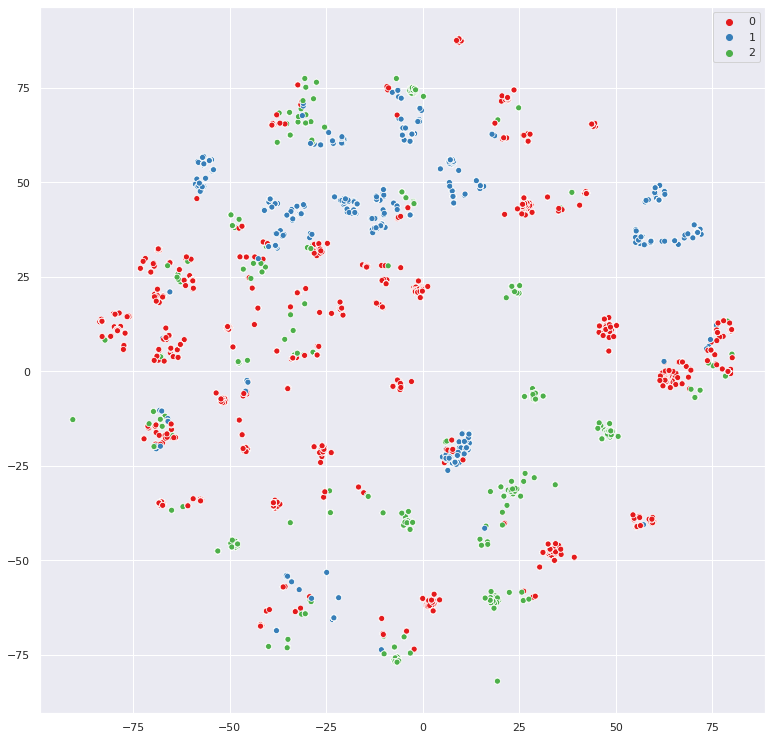

In [12]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,13)})

sns.scatterplot(x = visualization[:, 0], y = visualization[:, 1], hue=model.labels_, palette=sns.color_palette('Set1', 3))


**Testing same database with 20 clusters**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f77557668>,
      dtype=object)

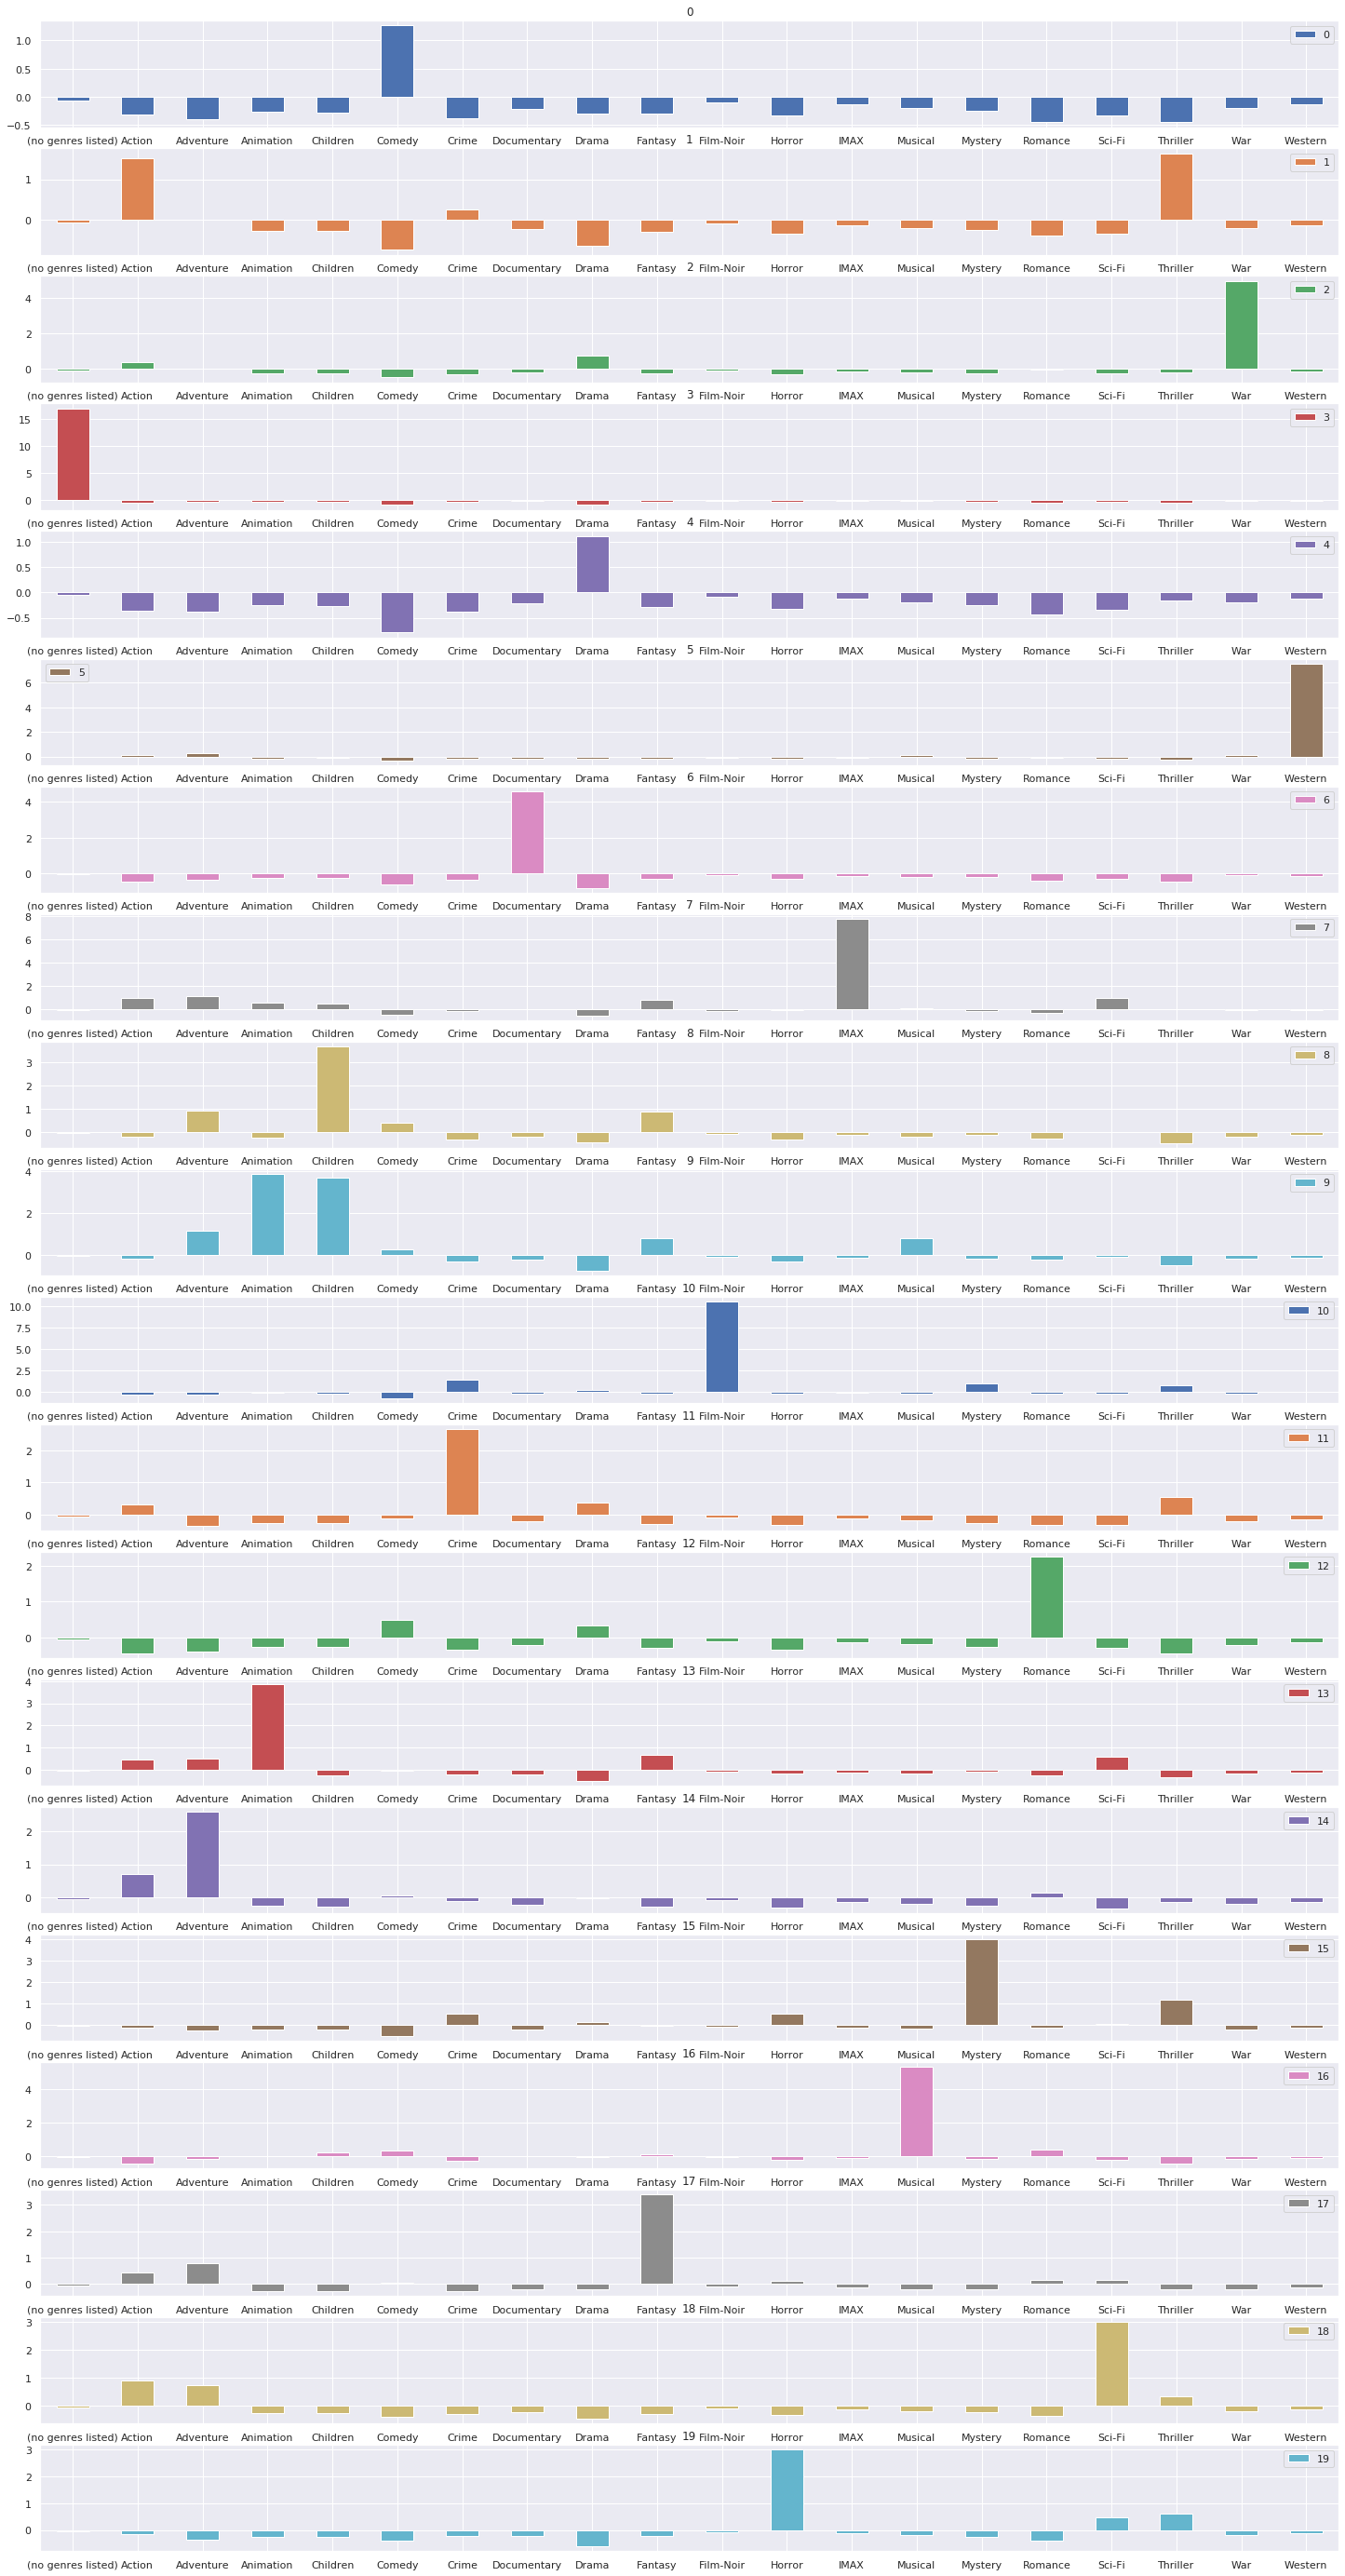

In [13]:
model = KMeans(n_clusters=20)

model.fit(genres_scaled)

movies_groups = pd.DataFrame(model.cluster_centers_, columns=genres.columns)

movies_groups.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

**Checking the content of the 'Sci-Fi' cluster**

In [14]:
group = 0

filter = model.labels_ == group

movies_data[filter].sample(10)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3359,4563,Young Einstein (1988),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2441,3254,Wayne's World 2 (1993),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5165,8366,Saved! (2004),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3642,5004,"Party, The (1968)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9726,190209,Jeff Ross Roasts the Border (2017),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4098,5874,Friday After Next (2002),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1707,2295,"Impostors, The (1998)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9163,148632,Applesauce (2015),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7453,81537,Due Date (2010),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4087,5840,"My Mother's Castle (Château de ma mère, Le) (1...",Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**Creating a function to check number of cluster accuracy**

In [0]:
def kmeans(cluster_number, genres):
  model = KMeans(n_clusters=cluster_number)
  model.fit(genres)
  return [cluster_number, model.inertia_]

In [16]:
results = [kmeans(quantity_clusters, genres_scaled) for quantity_clusters in range (1,41)]  # checking accuracy up to 40 clusters

results

[[1, 194840.0],
 [2, 179528.16927707611],
 [3, 168069.06601058375],
 [4, 157465.48978380635],
 [5, 147259.24832787435],
 [6, 137164.64896034115],
 [7, 128839.9630904353],
 [8, 118148.00106349692],
 [9, 110293.48756030135],
 [10, 103459.36113858223],
 [11, 93977.66716877831],
 [12, 87833.14550758337],
 [13, 81582.75232135518],
 [14, 73370.02244803753],
 [15, 70658.32976423006],
 [16, 63592.45687991965],
 [17, 61639.96189167635],
 [18, 58780.81229819842],
 [19, 57461.92387017305],
 [20, 55715.61203327192],
 [21, 52780.7252888606],
 [22, 51790.76687825693],
 [23, 50572.39728699759],
 [24, 49808.80334877755],
 [25, 47668.09651758919],
 [26, 45971.112675658],
 [27, 46101.27746931981],
 [28, 45074.81689208075],
 [29, 43740.86256454973],
 [30, 41829.04500528397],
 [31, 41948.42774763987],
 [32, 40848.717153004545],
 [33, 39589.890522816815],
 [34, 38984.92488397461],
 [35, 39164.30374842138],
 [36, 37191.403886557615],
 [37, 37458.068423700344],
 [38, 36883.52374490881],
 [39, 35815.048304841

In [17]:
results = pd.DataFrame(results, columns=['groups','inertia'])

results

,groups,inertia
0,1,194840.000000
1,2,179528.169277
2,3,168069.066011
3,4,157465.489784
4,5,147259.248328
5,6,137164.648960
6,7,128839.963090
7,8,118148.001063
8,9,110293.487560
9,10,103459.361139


**Elbow Method**

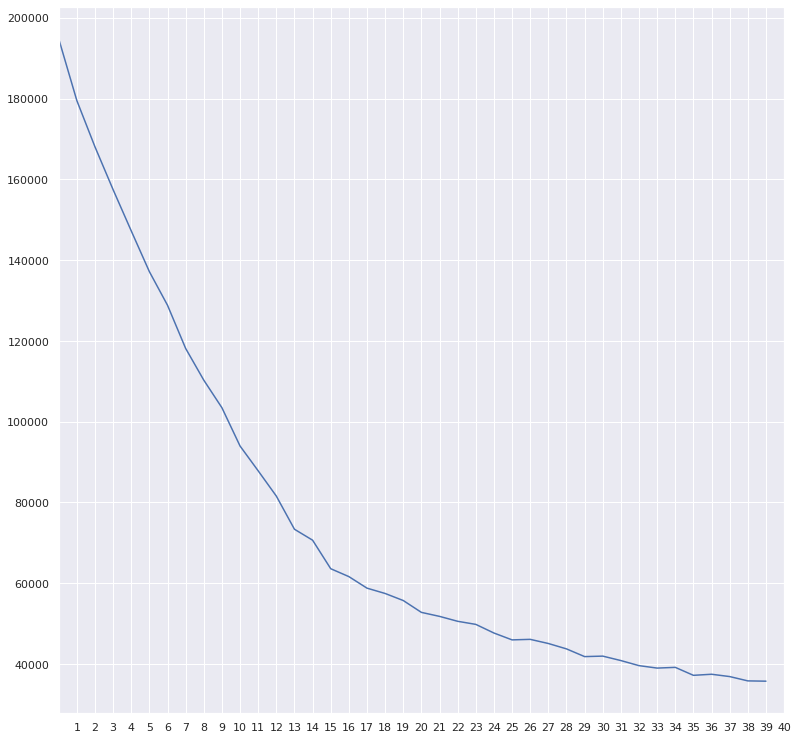

In [18]:
results.inertia.plot(xticks=results.groups)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f74267240>,
      dtype=object)

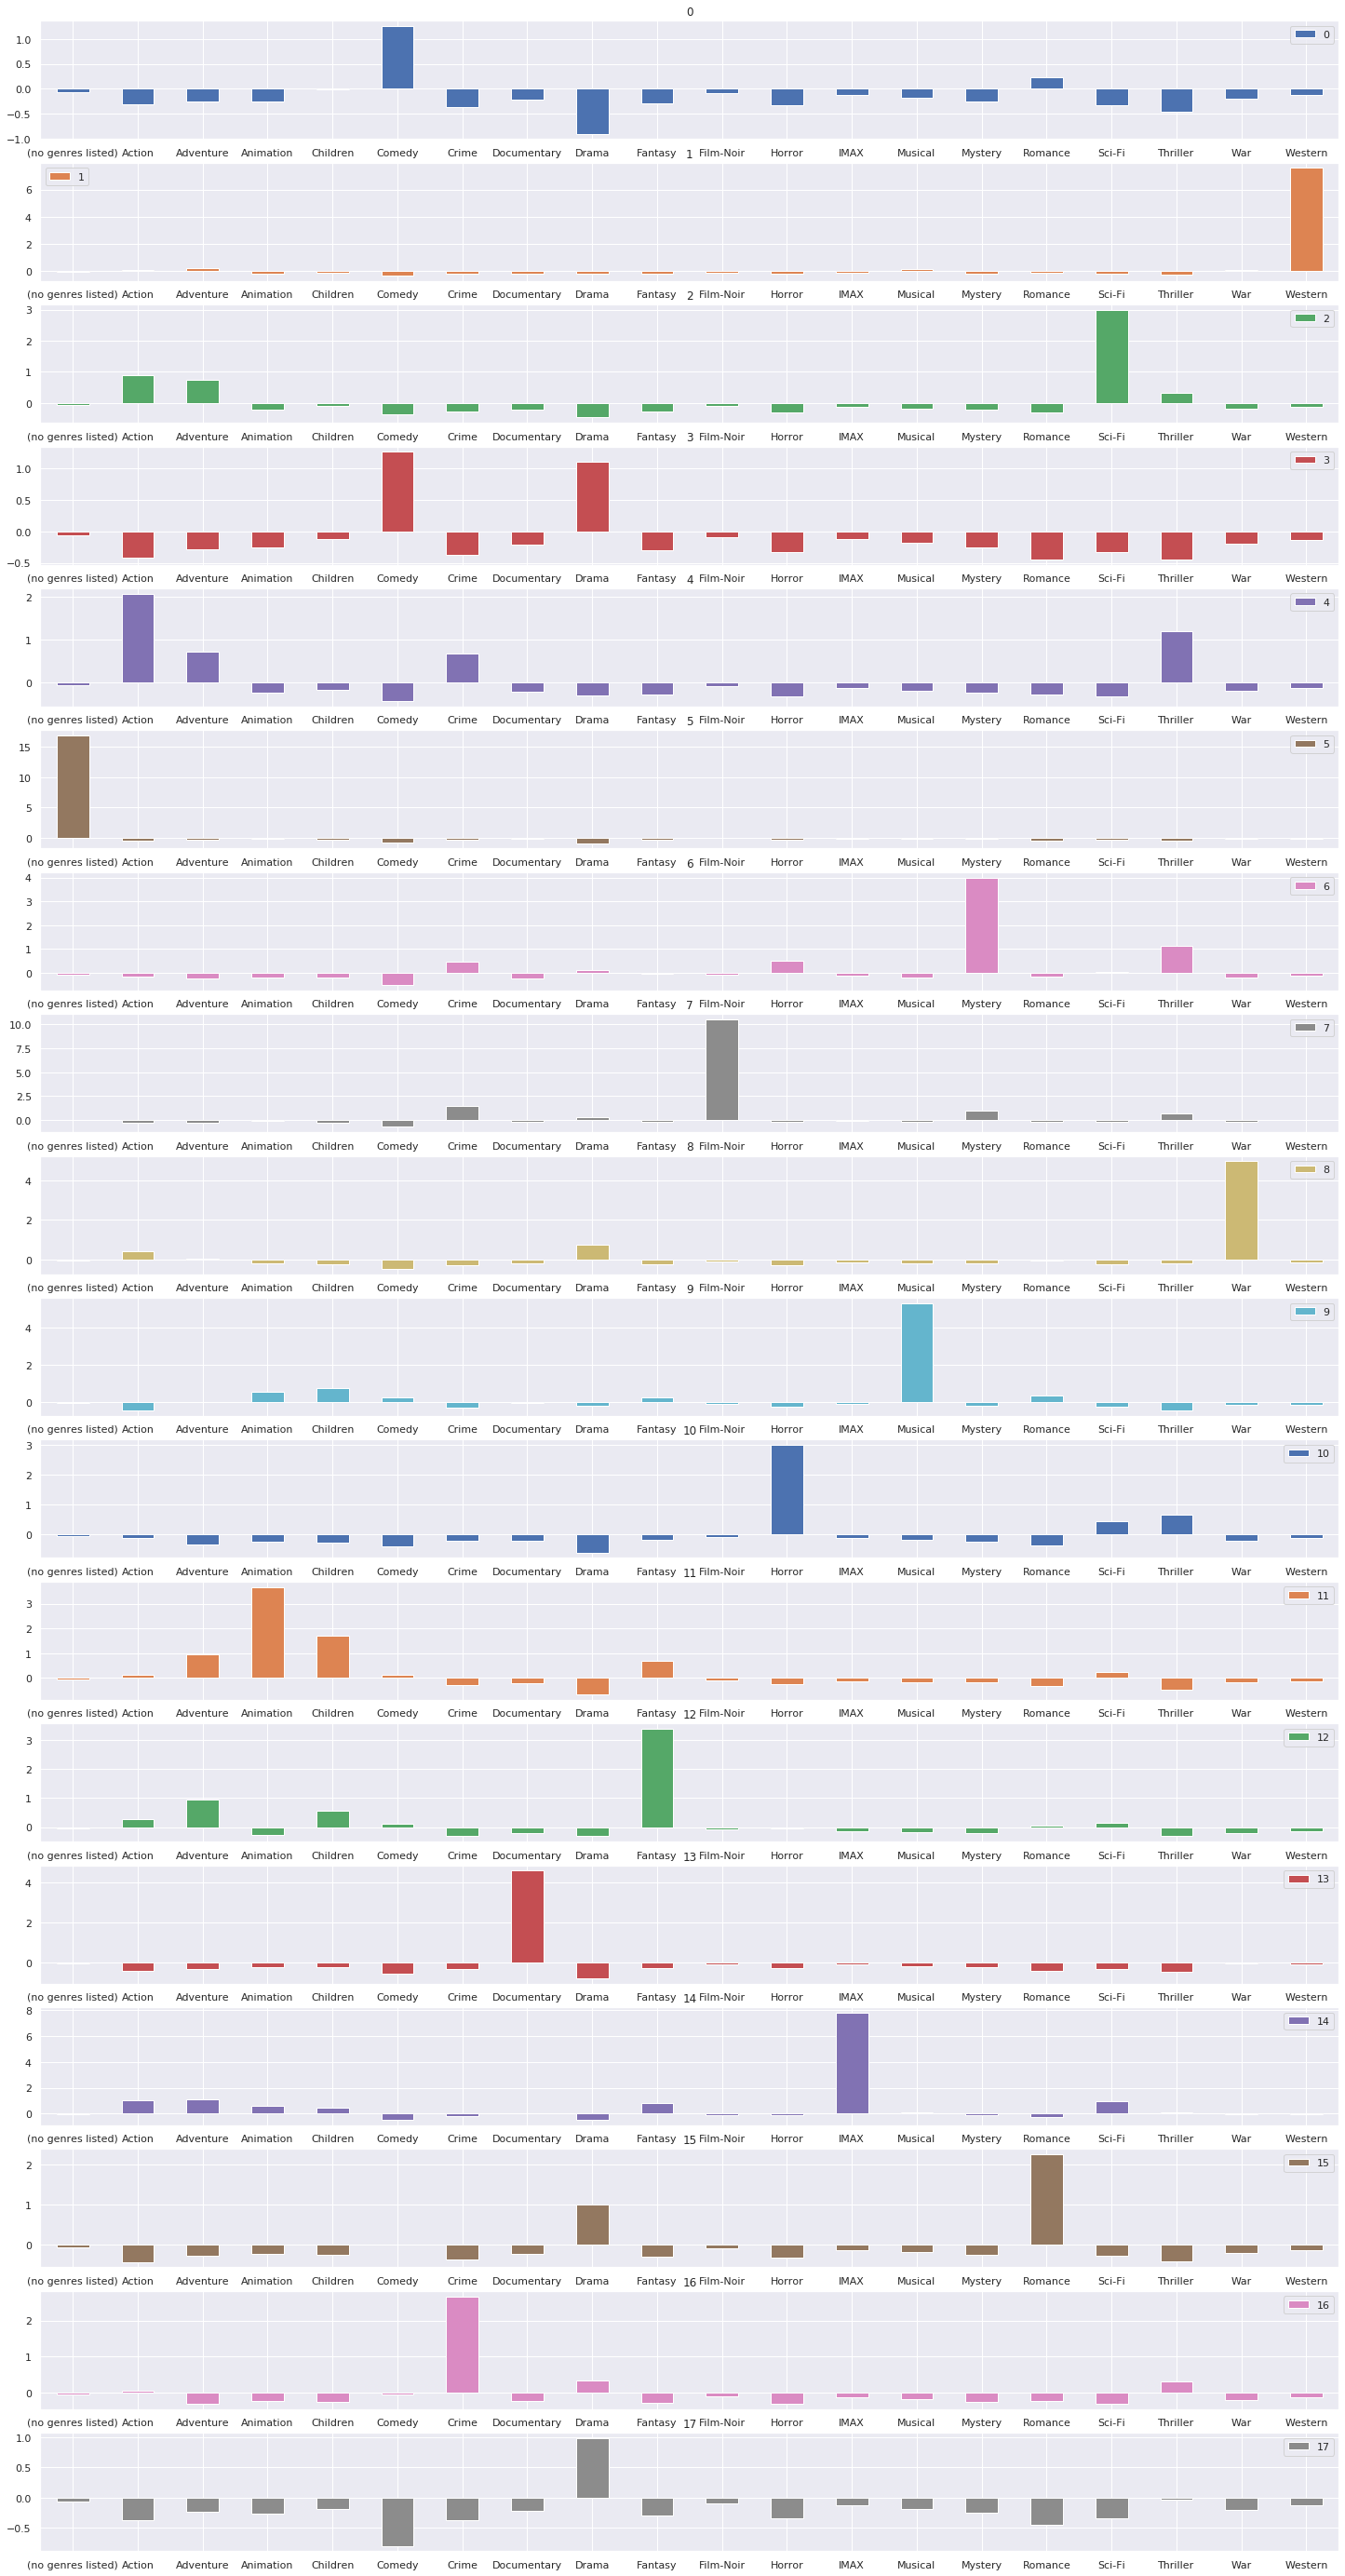

In [19]:
# The elbow seems to be on 18 groups, so let's try this amount of clusters

model = KMeans(n_clusters=18)
model.fit(genres_scaled)

movies_groups = pd.DataFrame(model.cluster_centers_, columns=genres.columns)

movies_groups.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

**Checking content 'Comedy' cluster**

In [20]:
group = 0

filter = model.labels_ == group

movies_data[filter].sample(10)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3469,4733,"Curse of the Jade Scorpion, The (2001)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
361,417,Barcelona (1994),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4699,7015,Only the Lonely (1991),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
440,505,North (1994),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2979,3991,102 Dalmatians (2000),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2616,3501,Murphy's Romance (1985),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1070,1390,My Fellow Americans (1996),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6934,65088,Bedtime Stories (2008),Adventure|Children|Comedy,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8431,111617,Blended (2014),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2899,3882,Bring It On (2000),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Generating clusters in a way the algorithm knows which groups are similar to each other**

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
model = AgglomerativeClustering(n_clusters=18)
movies_groups = model.fit_predict(genres_scaled)

movies_groups

array([ 2, 14, 13, ...,  0,  2,  3])

**Preparing data to plot a new chart**

In [25]:
tsne = TSNE()
visualization = tsne.fit_transform(genres_scaled)

visualization

array([[ 11.284469 ,  25.810247 ],
       [-33.701084 ,  49.084637 ],
       [-15.021492 ,  17.721125 ],
       ...,
       [-33.29424  , -12.295507 ],
       [ 11.605267 ,  37.88839  ],
       [  4.0970535,  -2.5022013]], dtype=float32)

**Plotting the chart**

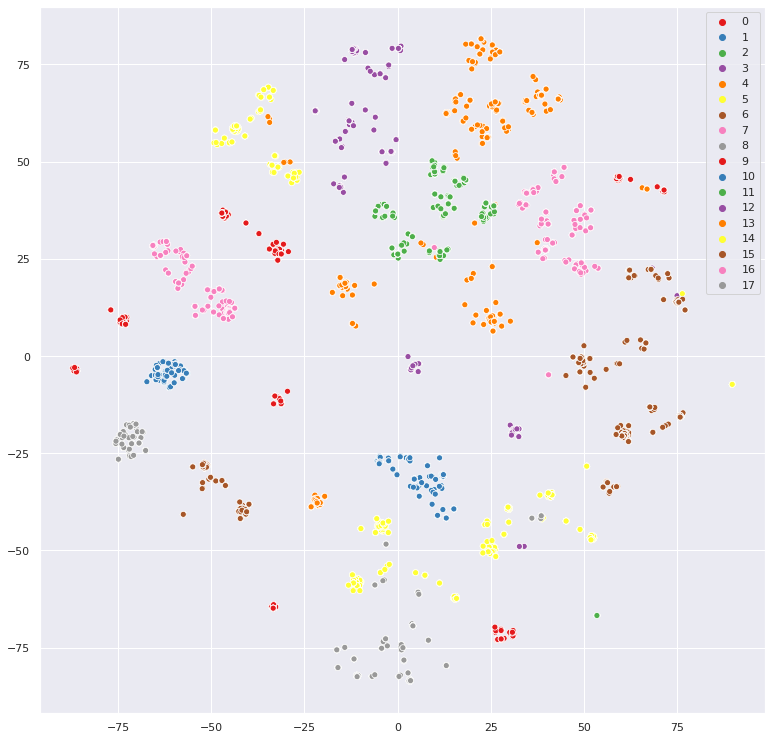

In [27]:
sns.scatterplot(x=visualization[:, 0], y=visualization[:, 1], hue=movies_groups, palette=sns.color_palette('Set1', 18))

**Same chart but showing clusters similarities**

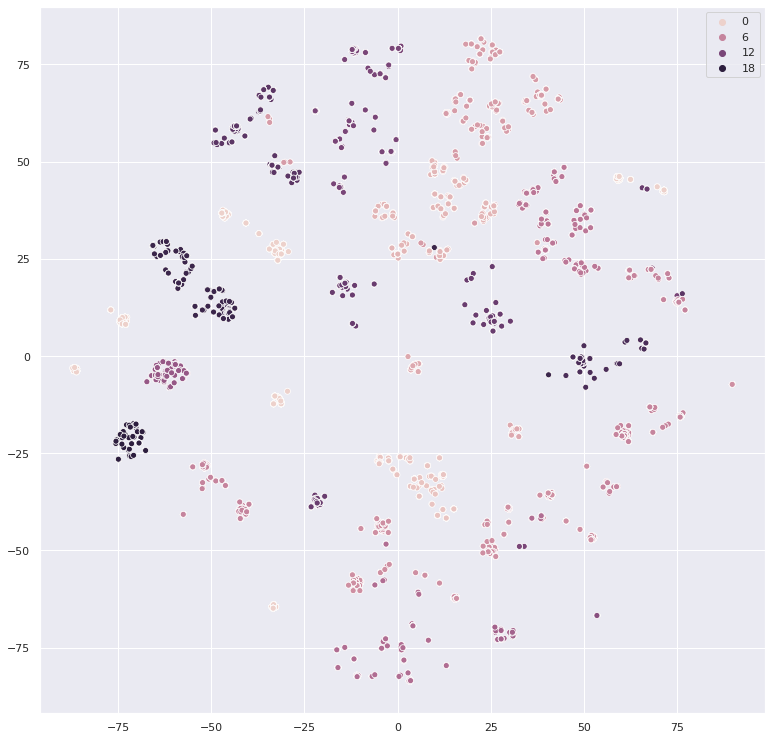

In [29]:
sns.scatterplot(x=visualization[:, 0], y=visualization[:, 1], hue=movies_groups)

**Creating a Dendrogram**

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f72aa25f8>,
      dtype=object)

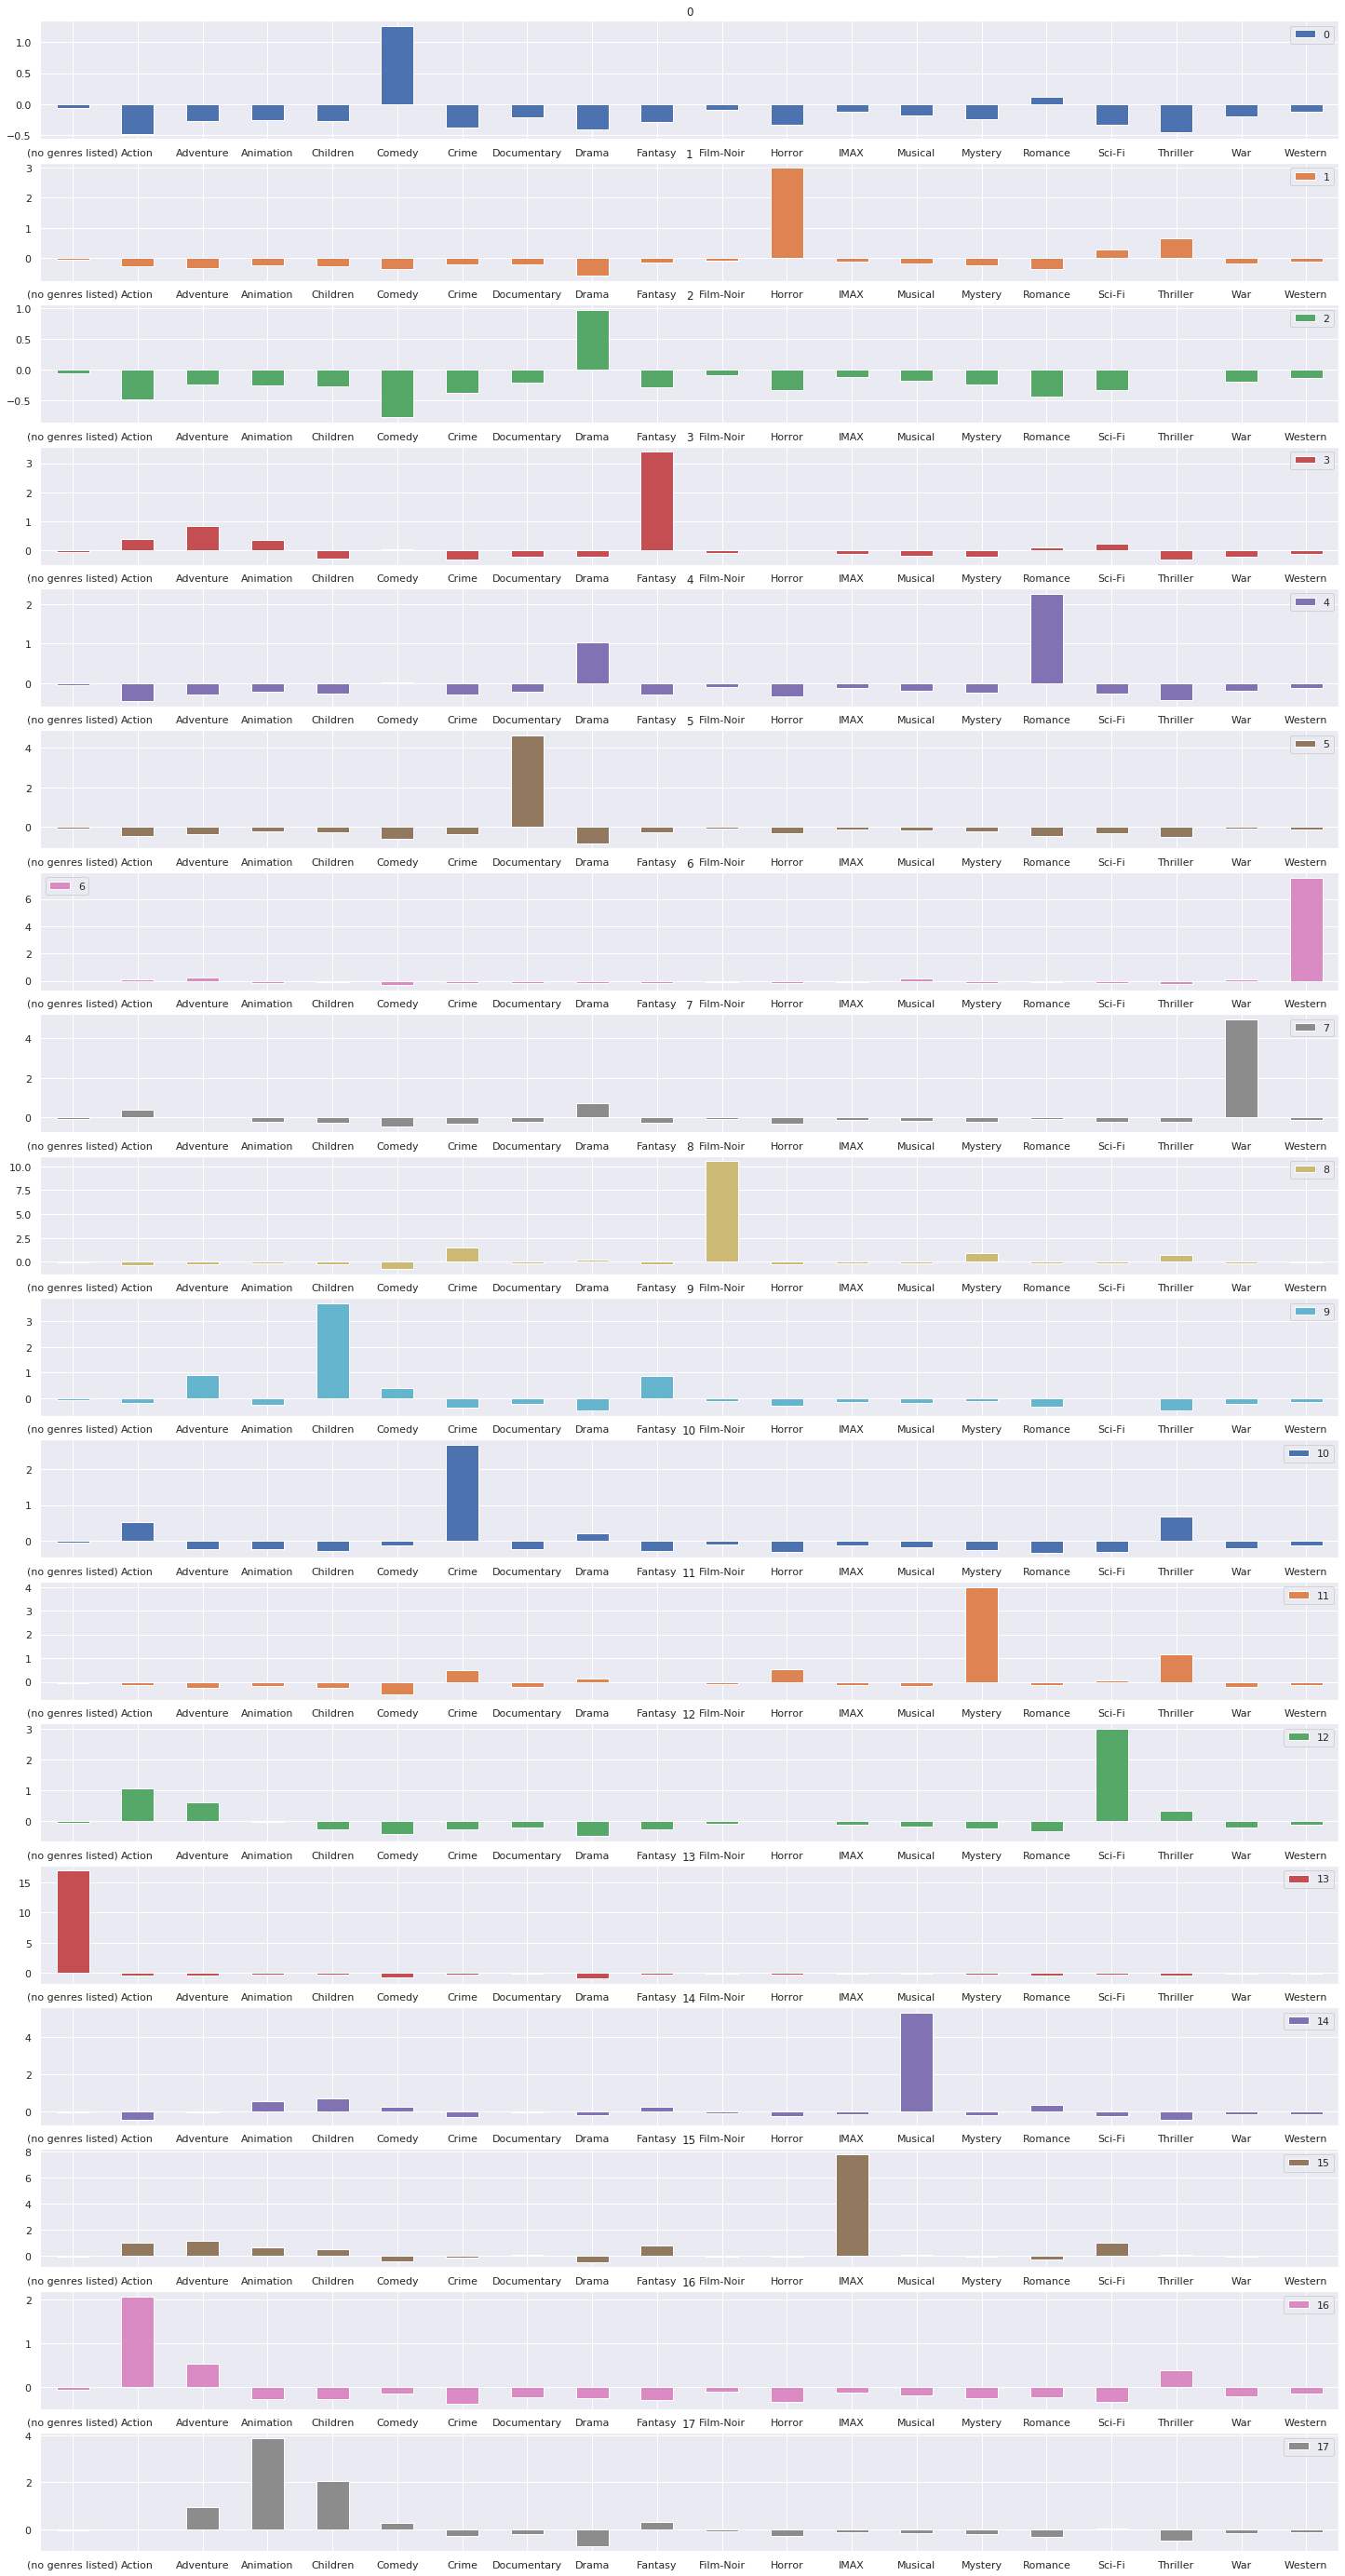

In [32]:
model = KMeans(n_clusters=18)
model.fit(genres_scaled)

movies_groups = pd.DataFrame(model.cluster_centers_, columns=genres.columns)

movies_groups.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

**Distance matrix of every cluster**

In [33]:
distance_matrix = linkage(movies_groups)
distance_matrix

array([[ 0.        ,  2.        ,  2.56911716,  2.        ],
       [ 4.        , 18.        ,  2.85099275,  3.        ],
       [16.        , 19.        ,  3.03924616,  4.        ],
       [10.        , 20.        ,  3.4316953 ,  5.        ],
       [12.        , 21.        ,  3.51980935,  6.        ],
       [ 1.        , 22.        ,  3.81280849,  7.        ],
       [ 3.        , 23.        ,  4.23646108,  8.        ],
       [ 9.        , 24.        ,  4.4340578 ,  9.        ],
       [17.        , 25.        ,  4.49424233, 10.        ],
       [11.        , 26.        ,  4.69915996, 11.        ],
       [ 5.        , 27.        ,  5.16239873, 12.        ],
       [ 7.        , 28.        ,  5.26967913, 13.        ],
       [14.        , 29.        ,  5.78125192, 14.        ],
       [ 6.        , 30.        ,  7.87733783, 15.        ],
       [15.        , 31.        ,  8.30153459, 16.        ],
       [ 8.        , 32.        , 10.81846928, 17.        ],
       [13.        , 33.

**Plotting the Dendrogram of 18 clusters**

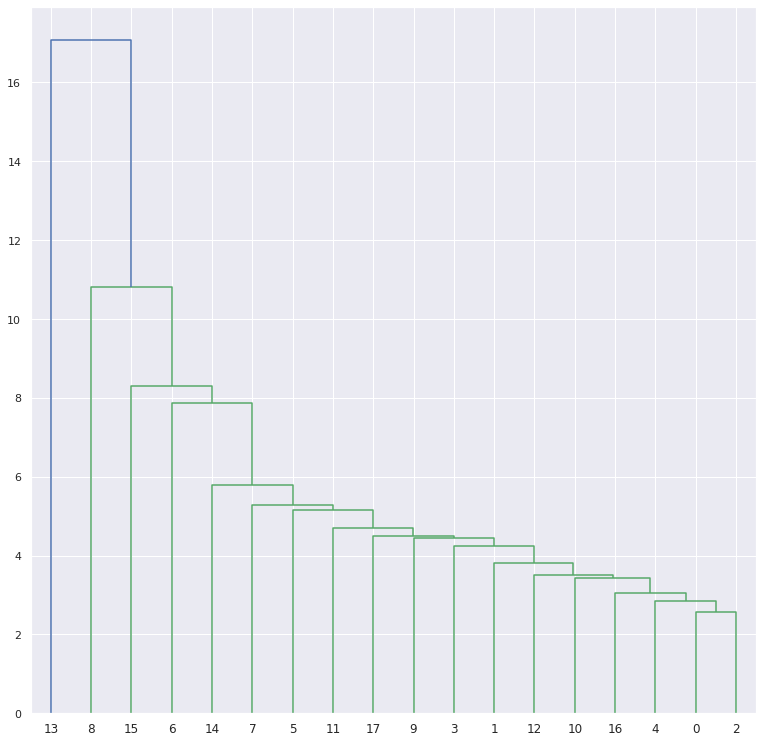

In [34]:
d_tree = dendrogram(distance_matrix)